In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, levy_stable
import scipy
from statsmodels.distributions.empirical_distribution import ECDF

sns.set()
pi = np.pi

# def ECDF(Xs):
#     xs = np.sort(Xs)
#     ys = np.arange(len(xs))/float(len(xs))
#     return xs, ys

In [11]:
def _stable_random_variables(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha
    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables(alpha, beta, gamma, delta):
    Z = _stable_random_variables(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta

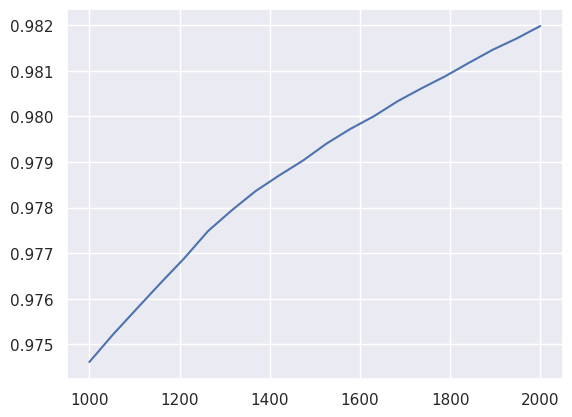

In [49]:
alpha = 0.5
beta = 1
gamma = 1
delta = 0
n = 200000
Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
ecdf = ECDF(Xs)
xs = np.linspace(1000,2000,20)
Fx = ecdf(xs)
plt.plot(xs, ecdf(xs))
plt.show()

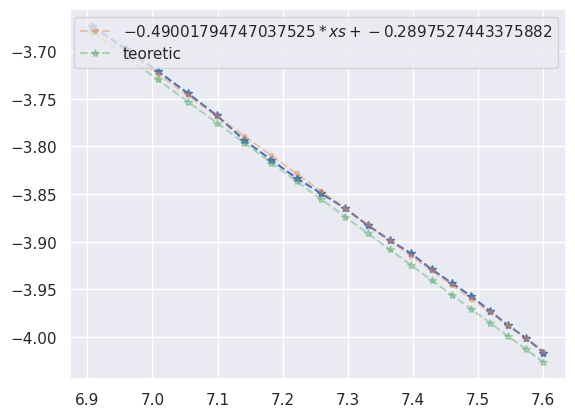

In [51]:
plt.plot(np.log(xs), np.log(1-Fx), "*--")
a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
plt.plot(np.log(xs), a*np.log(xs) + b,".--", label = f"${a}*xs+{b}$", alpha = 0.4)
c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
ys = gamma**alpha*c_a*(1+beta)*(gamma*xs+delta+beta*gamma*np.tan(pi*alpha/2))**(-alpha)
ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

plt.plot(np.log(xs), np.log(ys) ,"*--", label = f"teoretic", alpha = 0.4)

plt.legend()
plt.show()